Import libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from xgboost import XGBRegressor  # Import XGBoost
import matplotlib.pyplot as plt
import seaborn as sns

Provide the path as a file and Read the file using pd.read_csv

In [5]:
train_dataset = pd.read_csv('C:/Users/User/Desktop/semester 6/data mining/kagalle project/train.csv')
test_dataset = pd.read_csv('C:/Users/User/Desktop/semester 6/data mining/kagalle project/test.csv')

view the datasets

In [6]:
#view the train dataset
train_dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
#view the test dataset
test_dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

preprocessiong

In [8]:
#pre_process function train and test dataframes
def pre_process(train_dataset):
    train_dataset=train_dataset.drop(['MiscFeature','PoolQC','Fence','Alley'],axis=1)
    num_train_dataset=train_dataset.select_dtypes(include='number')
    num_cols=num_train_dataset.columns
    for col in num_cols:
        train_dataset[col]=train_dataset[col].fillna(train_dataset[col].median())
    str_train_dataset=train_dataset.select_dtypes(include='object')
    str_cols=str_train_dataset.columns
    for col in str_cols:
        train_dataset[col]=train_dataset[col].fillna(train_dataset['LotShape'].value_counts().idxmax())
    for col in str_cols:
        train_dataset[col]=pd.factorize(train_dataset[col])[0]  
    return train_dataset    

ptr_train_dataset=pre_process(train_dataset)
ptr_train_dataset.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         0         65.0     8450       0         0   
1   2          20         0         80.0     9600       0         0   
2   3          60         0         68.0    11250       0         1   
3   4          70         0         60.0     9550       0         1   
4   5          60         0         84.0    14260       0         1   

   LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            0          0          0  ...              0          0   
1            0          0          1  ...              0          0   
2            0          0          0  ...              0          0   
3            0          0          2  ...            272          0   
4            0          0          1  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         0              0   
1            0         0        0       5    2007         0              0   
2            0         0        0       9    2008         0              0   
3            0         0        0       2    2006         0              1   
4            0         0        0      12    2008         0              0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 77 columns]

Exploraotry data analysis

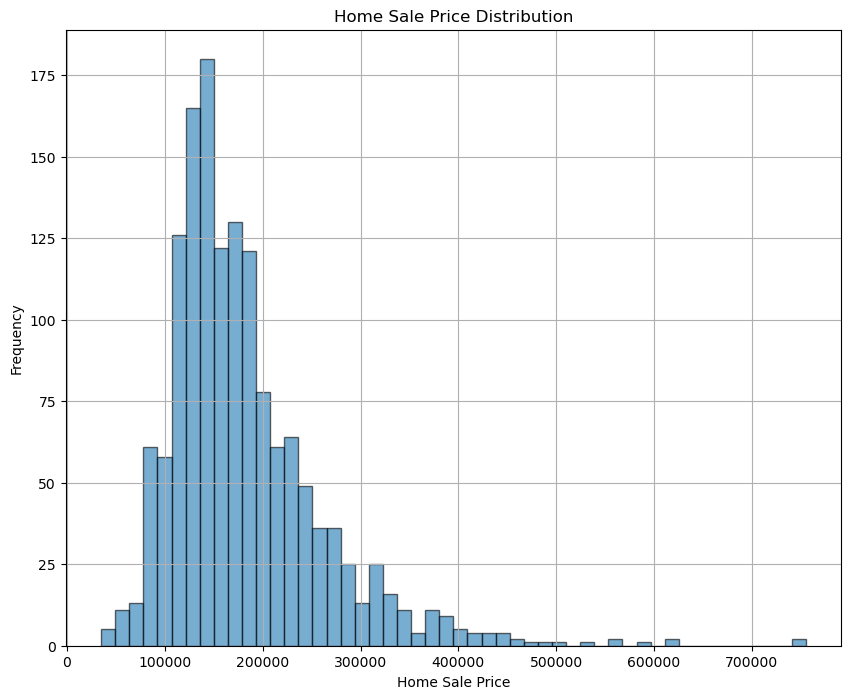

In [9]:
#view distribution of house sale price
plt.figure(figsize=(10, 8))
plt.hist(ptr_train_dataset['SalePrice'], bins=50, edgecolor='k', alpha=0.6)
plt.title('Home Sale Price Distribution')
plt.xlabel('Home Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

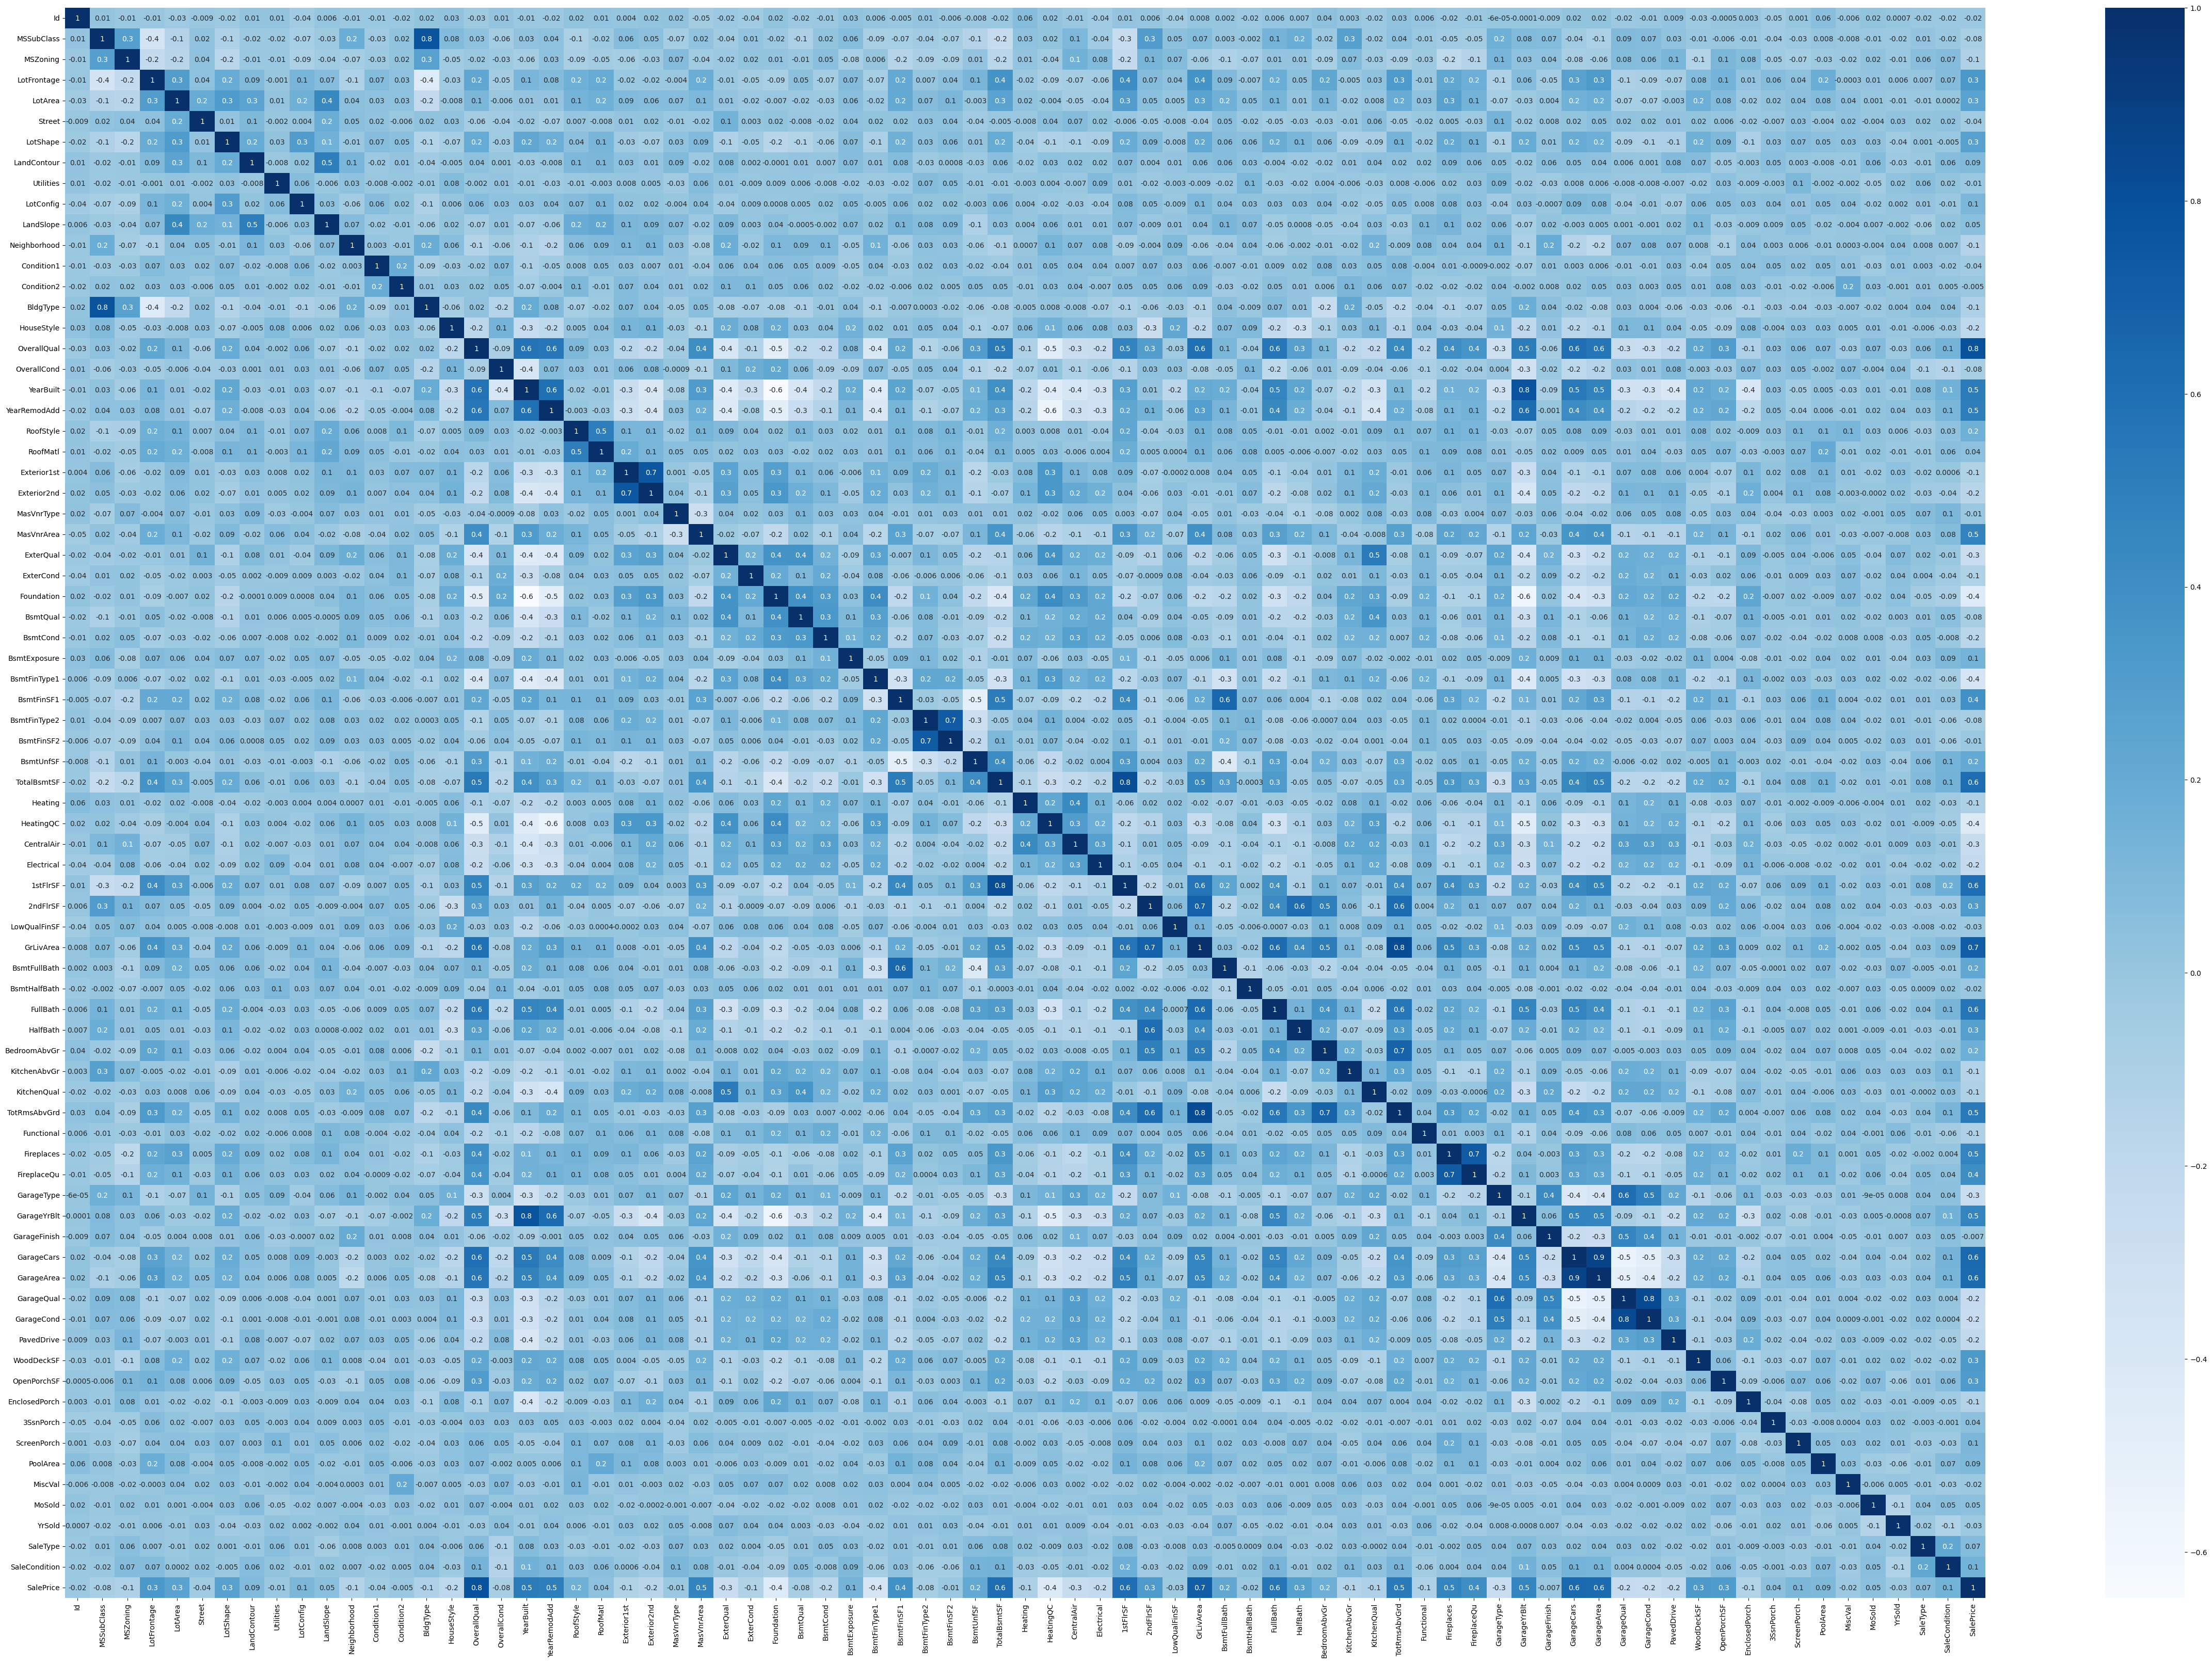

In [8]:

#correlation matrix
cor=ptr_train_dataset.corr()
plt.figure(figsize=(60,40))
sns.heatmap(data=cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

In [10]:
#Exploratory Data Analysis
eda_cols=['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','SalePrice']
eda_train_dataset=train_dataset[eda_cols]
eda_train_dataset

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  \
0               7       2003          2003       196.0          856       856   
1               6       1976          1976         0.0         1262      1262   
2               7       2001          2002       162.0          920       920   
3               7       1915          1970         0.0          756       961   
4               8       2000          2000       350.0         1145      1145   
...           ...        ...           ...         ...          ...       ...   
1455            6       1999          2000         0.0          953       953   
1456            6       1978          1988       119.0         1542      2073   
1457            7       1941          2006         0.0         1152      1188   
1458            5       1950          1996         0.0         1078      1078   
1459            5       1965          1965         0.0         1256      1256   

      GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0          1710         2             8           0       2003.0           2   
1          1262         2             6           1       1976.0           2   
2          1786         2             6           1       2001.0           2   
3          1717         1             7           1       1998.0           3   
4          2198         2             9           1       2000.0           3   
...         ...       ...           ...         ...          ...         ...   
1455       1647         2             7           1       1999.0           2   
1456       2073         2             7           2       1978.0           2   
1457       2340         2             9           2       1941.0           1   
1458       1078         1             5           0       1950.0           1   
1459       1256         1             6           0       1965.0           1   

      GarageArea  SalePrice  
0            548     208500  
1            460     181500  
2            608     223500  
3            642     140000  
4            836     250000  
...          ...        ...  
1455         460     175000  
1456         500     210000  
1457         252     266500  
1458         240     142125  
1459         276     147500  

[1460 rows x 14 columns]

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1500 with 0 Axes>

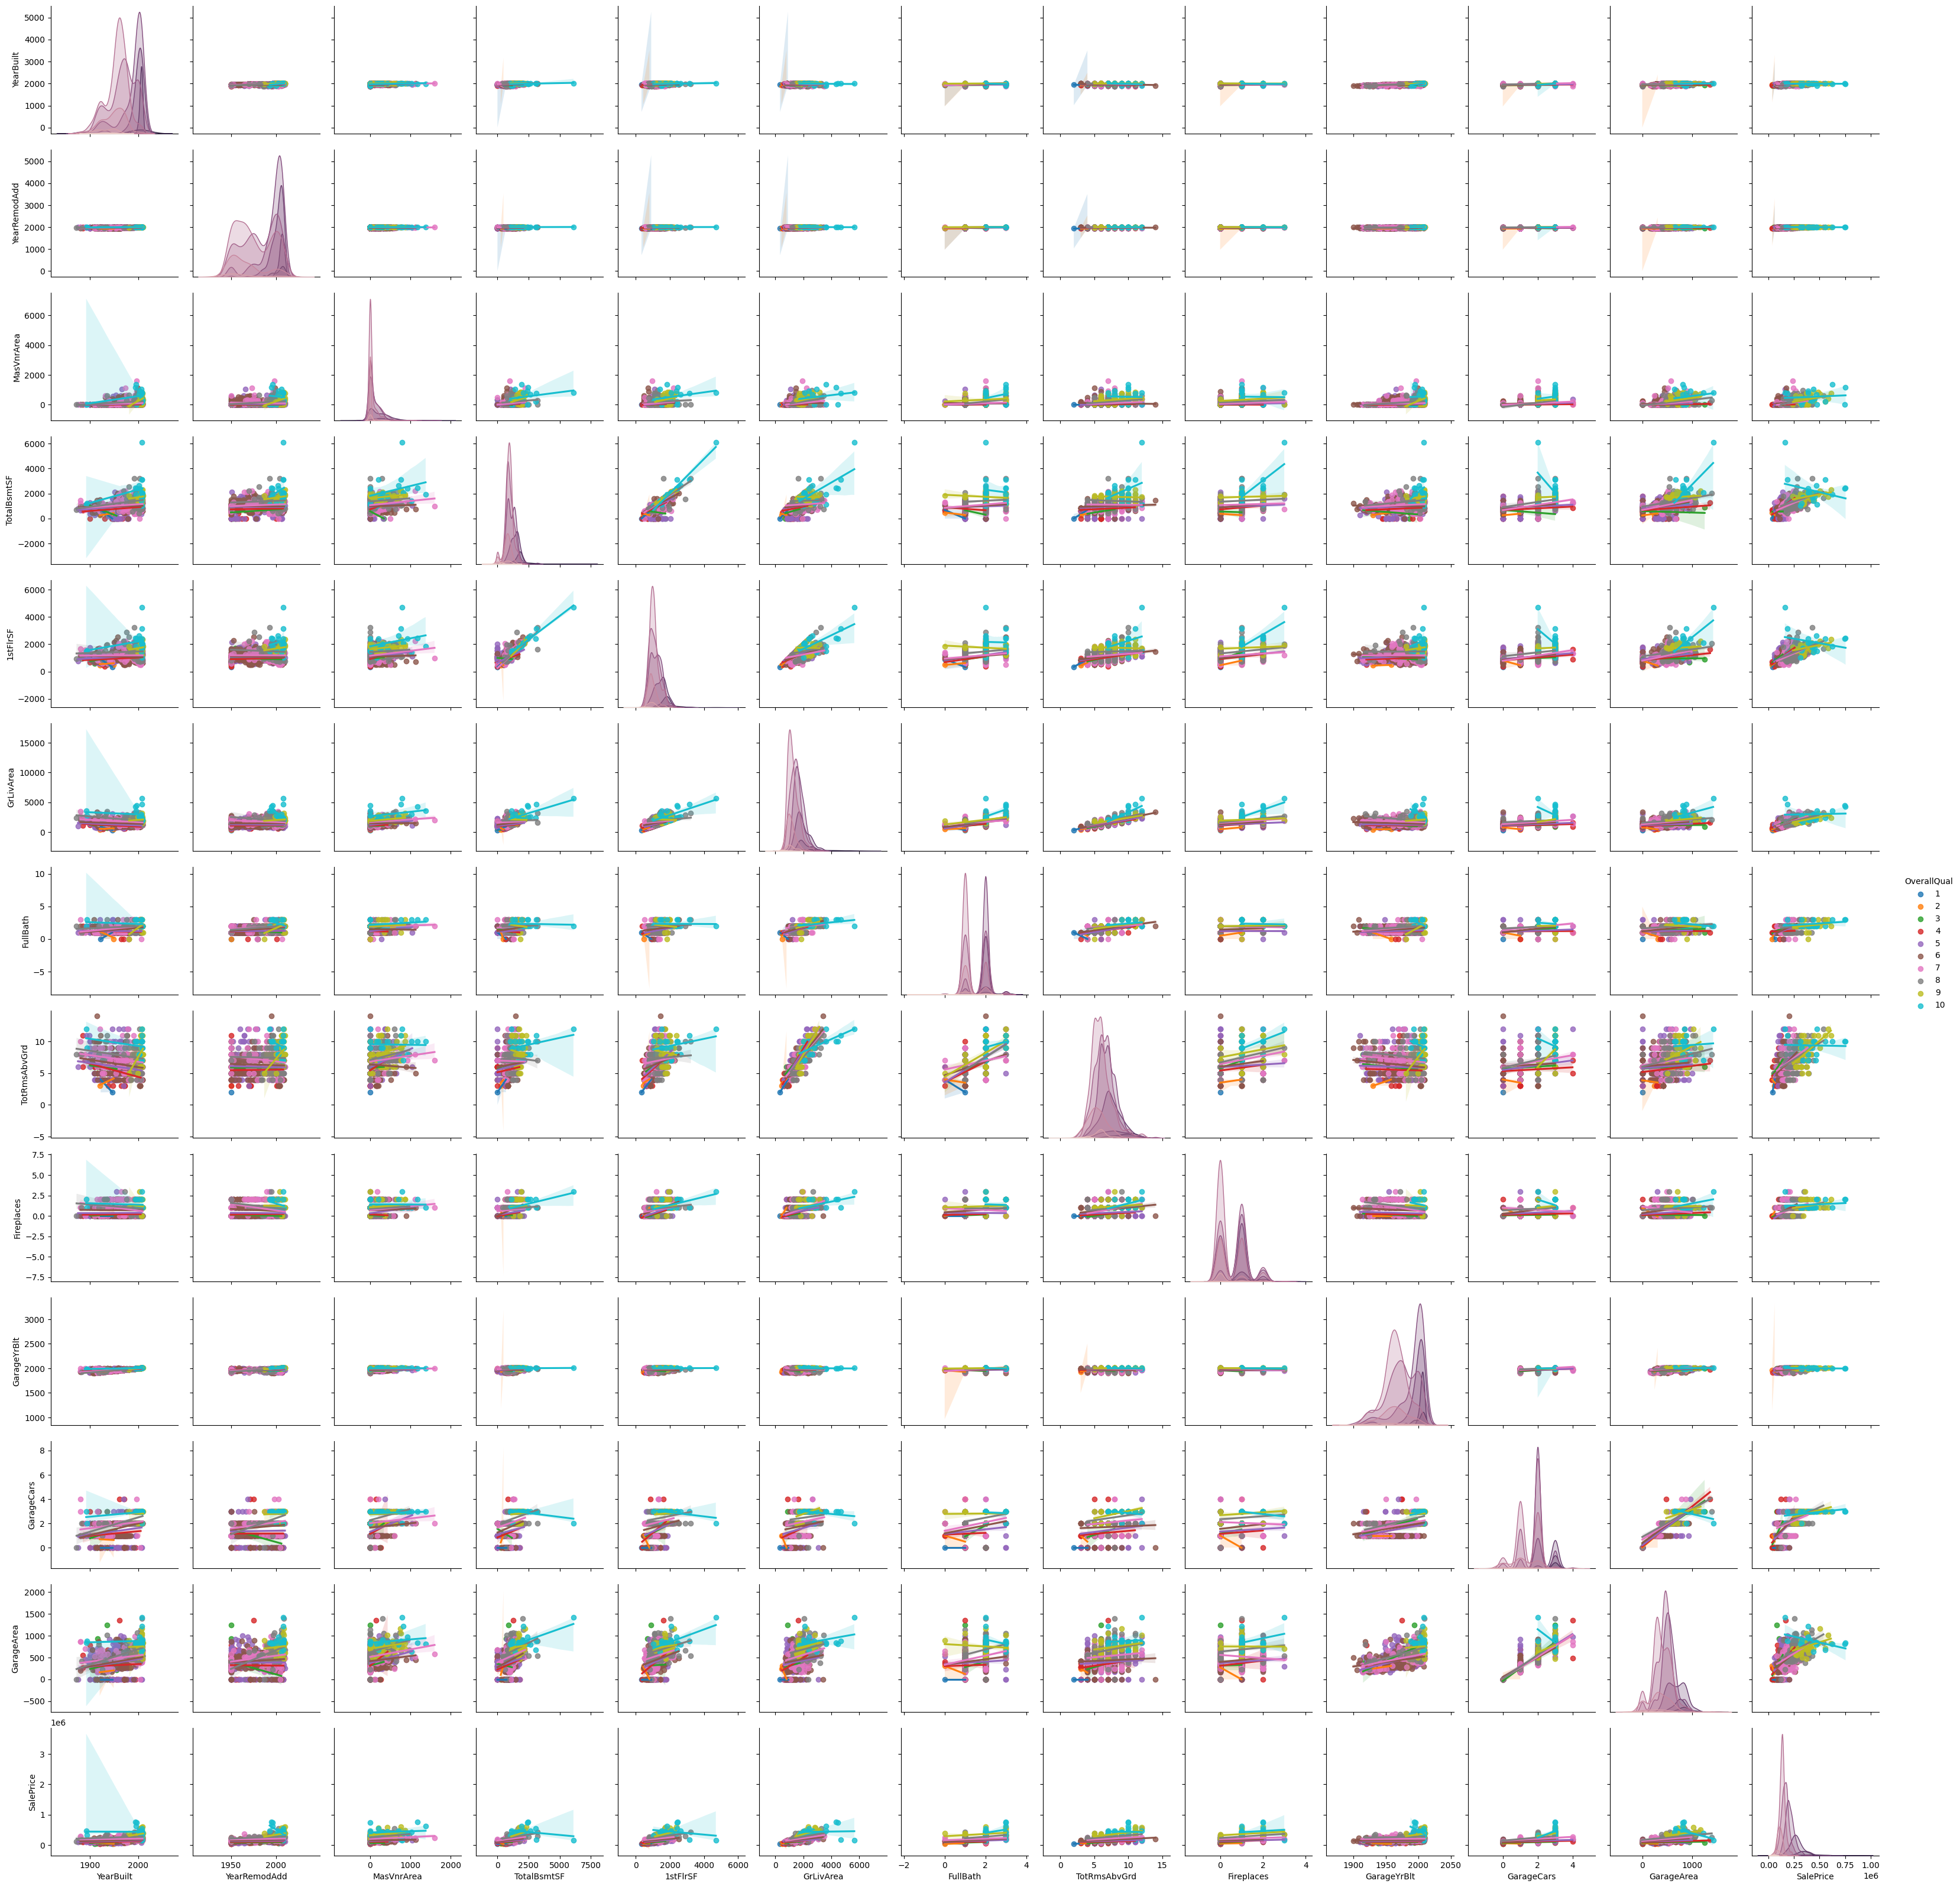

In [10]:
plt.figure(figsize=(20,15))
sns.pairplot(data=eda_train_dataset,diag_kind='kde',hue='OverallQual',kind='reg')
plt.show()

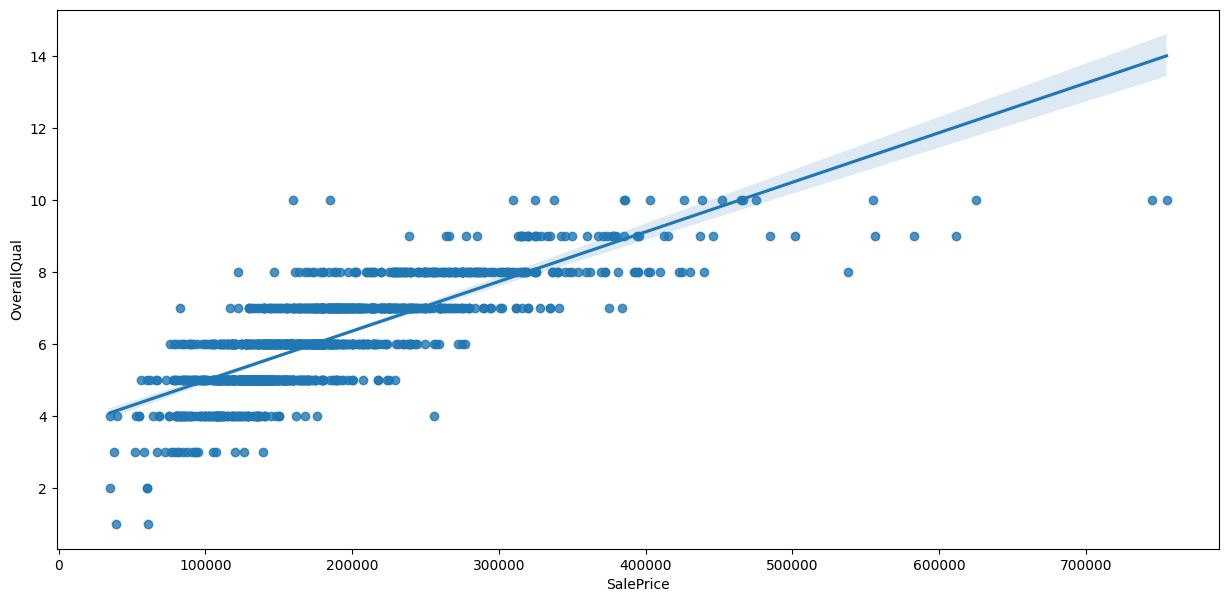

In [11]:
plt.figure(figsize=(15,7))
sns.regplot(data=eda_train_dataset,x='SalePrice',y='OverallQual')
plt.show()

In [11]:
#process test data
pts_test_dataset=pre_process(test_dataset)
pts_test_dataset.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  1461          20         0         80.0    11622       0         0   
1  1462          20         1         81.0    14267       0         1   
2  1463          60         1         74.0    13830       0         1   
3  1464          60         1         78.0     9978       0         1   
4  1465         120         1         43.0     5005       0         1   

   LandContour  Utilities  LotConfig  ...  OpenPorchSF  EnclosedPorch  \
0            0          0          0  ...            0              0   
1            0          0          1  ...           36              0   
2            0          0          0  ...           34              0   
3            0          0          0  ...           36              0   
4            1          0          0  ...           82              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0          120         0        0       6    2010         0   
1          0            0         0    12500       6    2010         0   
2          0            0         0        0       3    2010         0   
3          0            0         0        0       6    2010         0   
4          0          144         0        0       1    2010         0   

   SaleCondition  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 76 columns]

In [12]:
#split the train data as x and y label
X=ptr_train_dataset.drop('SalePrice',axis=1)
X.head()
y=train_dataset['SalePrice']

In [21]:
#find mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score
model=GradientBoostingRegressor(n_estimators=700)
model.fit(X,y)
pred=model.predict(X)
mape=mean_absolute_percentage_error(y,pred)
r2=r2_score(y,pred)
print(mape,r2)

0.025218851119457535 0.9957887271432251


In [1]:
# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Include 'Id' and 'SalePrice' columns in the testing set
testing_set = data.loc[y_test.index][['Id', 'SalePrice']]

# Create a DataFrame with 'Id', 'Actual', and 'Predicted' columns
predictions_df = pd.DataFrame({'Id': testing_set['Id'], 'Actual': testing_set['SalePrice'], 'Predicted': y_pred})

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


NameError: name 'LinearRegression' is not defined

In [26]:
# Model Prediction using test dataset
ts_pred=model.predict(pts_test_dataset)
end_pred=pd.DataFrame(ts_pred,index=test_dataset.index)
end_pred.columns=['SalePrice']

# Save the predictions to a CSV file for submission
end_pred.to_csv('submission4.csv',sep=',')
end_pred.head()

SalePrice
0  137718.253605
1  167169.435432
2  191822.153213
3  183282.972257
4  192115.507457

In [19]:
import os

# Get the current working directory
current_dir = os.getcwd()
print("Current working directory:", current_dir)

# List files in the current directory to confirm the location
files_in_dir = os.listdir(current_dir)
print("Files in current directory:", files_in_dir)


Current working directory: /kaggle/working
Files in current directory: ['submission4.csv', '.virtual_documents', 'submission2.csv']
